In [7]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
import torch.nn as nn


## Convolutions

### Data

Let's use cifar10 dataset, and choose birdies and airplanes.

We need to pass to tensor, because those images come as PIL images. And as a good practice, we'll normalize too

In [4]:
# getting values to normalize from the training samples
data_path = "data_unver/07/"
cifar10_train = datasets.CIFAR10(
    data_path, train=True, download=False, transform=transforms.ToTensor()
)
cifar10_train_stack = torch.stack([img for img, _ in cifar10_train], dim=3)
cifar10_train_stack.shape

torch.Size([3, 32, 32, 50000])

In [5]:
# values for the mean
means = cifar10_train_stack.view(3, -1).mean(dim=1)
stds = cifar10_train_stack.view(3, -1).std(dim=1)

In [6]:
# normalize and putting all on the pipeline
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=means, std=stds)
    ])
)
transformed_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=means, std=stds)
    ])
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


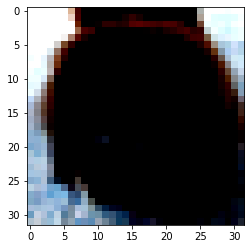

In [8]:
# lets do a sanity check the data is ok
img_t, _ = transformed_cifar10[999]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [9]:
# now we have just two classes to predict (airplane and bird)
label_map = {0: 0, 2: 1}
class_names = ["airplane", "bird"]
cifar2 = [(img, label_map[label]) for img, label in transformed_cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in transformed_cifar10_val if label in [0, 2]]

Nice, now we have all the data prepared!

## Conv Layers Experimentation

In [10]:
conv = nn.Conv2d(3, 16, kernel_size=3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [11]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [13]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape, img.shape

(torch.Size([1, 3, 32, 32]),
 torch.Size([1, 16, 30, 30]),
 torch.Size([3, 32, 32]))

The unsqueeze will create a new dimension on 0, to represent that there is just one batch of 1 image.

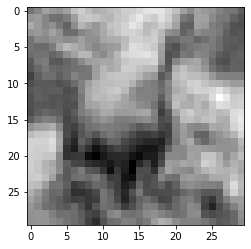

In [15]:
plt.imshow(output[0, 0].detach(), cmap="gray")
plt.show()

So, we lost a few pixels in the process, why?

### Padding the boundary